In [95]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
%matplotlib inline

In [3]:
df_index=pd.read_csv("generated_data_part_two.csv")
df_index.head()

,Traveling_Expenses,Supplies_Materials,Utility_Expenses,Communication_Expenses,General_Services,Repairs_Maintenance,Population,Budget
0,65795,220151,80467,7200,49974,73385,175,496972
1,50860,233767,193734,19172,15801,45158,364,558492
2,88158,224375,108506,7961,29190,70417,554,528607
3,94732,279262,119751,19207,48754,28289,817,589995
4,61284,236330,128906,26357,39592,14823,834,507292


In [4]:
df_index.isnull().sum()

Traveling_Expenses        0
Supplies_Materials        0
Utility_Expenses          0
Communication_Expenses    0
General_Services          0
Repairs_Maintenance       0
Population                0
Budget                    0
dtype: int64

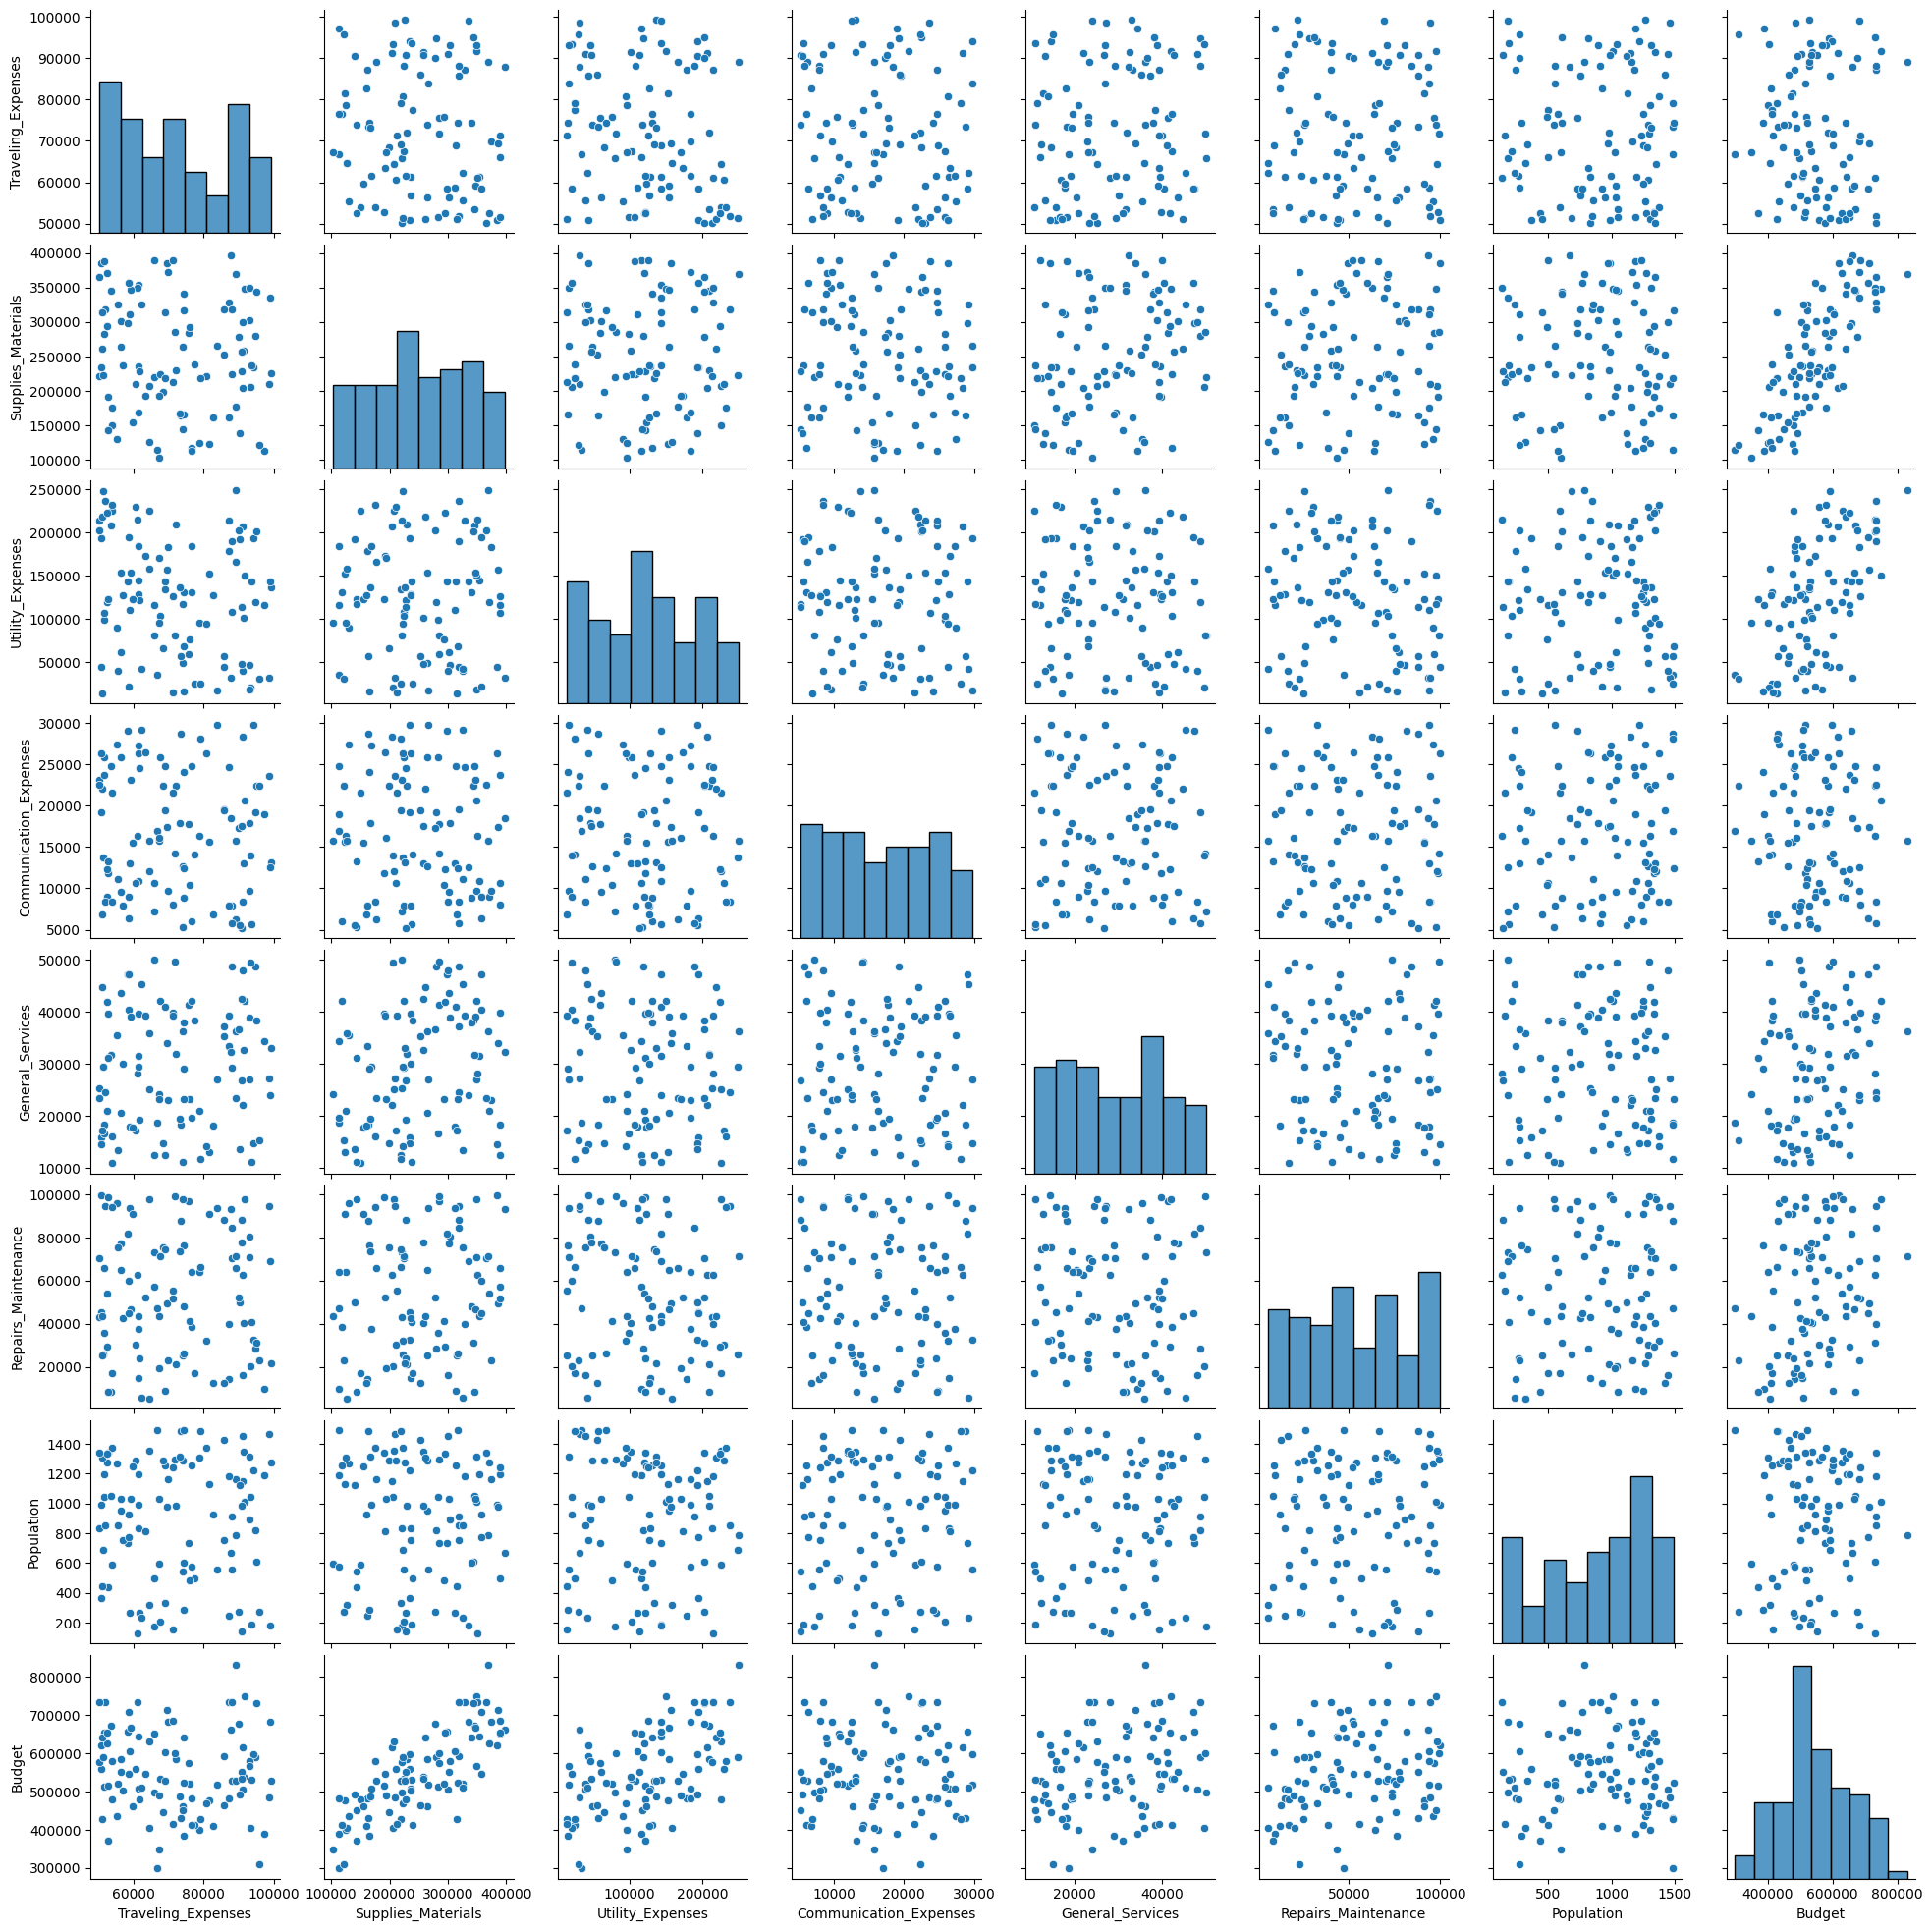

In [5]:
import seaborn as sns
sns.pairplot(df_index)

In [6]:
X = df_index.drop(columns = 'Budget')
y =df_index['Budget']

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)

In [88]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [90]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([734526., 547191., 408854., 731862., 510342., 559030., 735360.,
       411766., 478386., 713657., 389144., 558492., 580746., 517394.,
       504262., 429096., 830822., 654116., 672018., 405312., 512562.,
       657690., 446281., 537600., 516528., 532057., 483045., 668421.,
       450084., 683341., 508336., 733404., 641061., 576688., 496972.,
       429560., 599098., 482661., 552560., 546964., 579969., 487288.,
       522131., 528856., 686354., 534000., 641267., 479147., 601594.,
       462475., 593440., 605560., 681984., 298838., 601699., 644990.,
       428977., 461897., 521543., 528607., 585880., 550268., 709003.,
       502143., 507292., 676279., 590416., 651160., 528860., 732987.])

Text(0, 0.5, 'Predicted Budget')

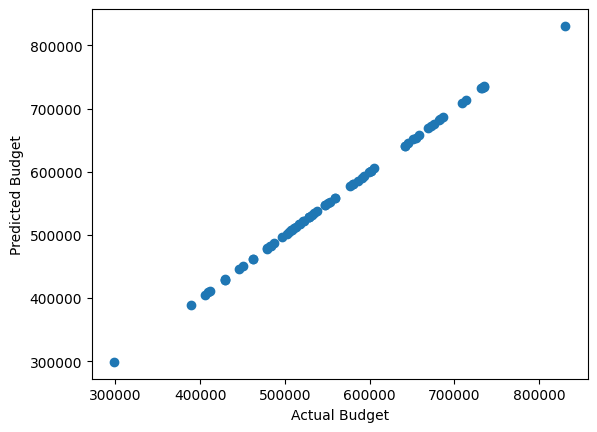

In [91]:
plt.scatter(y_train,y_pred_train)
plt.xlabel("Actual Budget")
plt.ylabel("Predicted Budget")

In [92]:
from sklearn.metrics import r2_score
score=r2_score(y_train,y_pred_train)
score

1.0

In [93]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_train,y_pred_train)
rmse=np.sqrt(mse)
print(mse)
print(rmse)

1.0019189718950867e-20
1.0009590260820304e-10


In [14]:
df_index.corr()

,Traveling_Expenses,Supplies_Materials,Utility_Expenses,Communication_Expenses,General_Services,Repairs_Maintenance,Population,Budget
Traveling_Expenses,1.000000,-0.109875,-0.210444,-0.077033,0.120943,-0.008980,-0.003443,-0.067277
Supplies_Materials,-0.109875,1.000000,-0.006110,-0.059890,0.257939,0.091158,-0.005629,0.784945
Utility_Expenses,-0.210444,-0.006110,1.000000,-0.049681,-0.066197,-0.141610,0.022038,0.534798
Communication_Expenses,-0.077033,-0.059890,-0.049681,1.000000,-0.034784,-0.011696,0.064754,-0.026198
General_Services,0.120943,0.257939,-0.066197,-0.034784,1.000000,-0.097598,-0.015053,0.248089
Repairs_Maintenance,-0.008980,0.091158,-0.141610,-0.011696,-0.097598,1.000000,0.046186,0.232527
Population,-0.003443,-0.005629,0.022038,0.064754,-0.015053,0.046186,1.000000,0.023776
Budget,-0.067277,0.784945,0.534798,-0.026198,0.248089,0.232527,0.023776,1.000000


In [96]:
X =sm.add_constant(X)
reg_res =sm.OLS(y,X).fit()
print(reg_res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Budget   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.040e+30
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:07:15   Log-Likelihood:                 2026.7
No. Observations:                 100   AIC:                            -4037.
Df Residuals:                      92   BIC:                            -4017.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -4.65

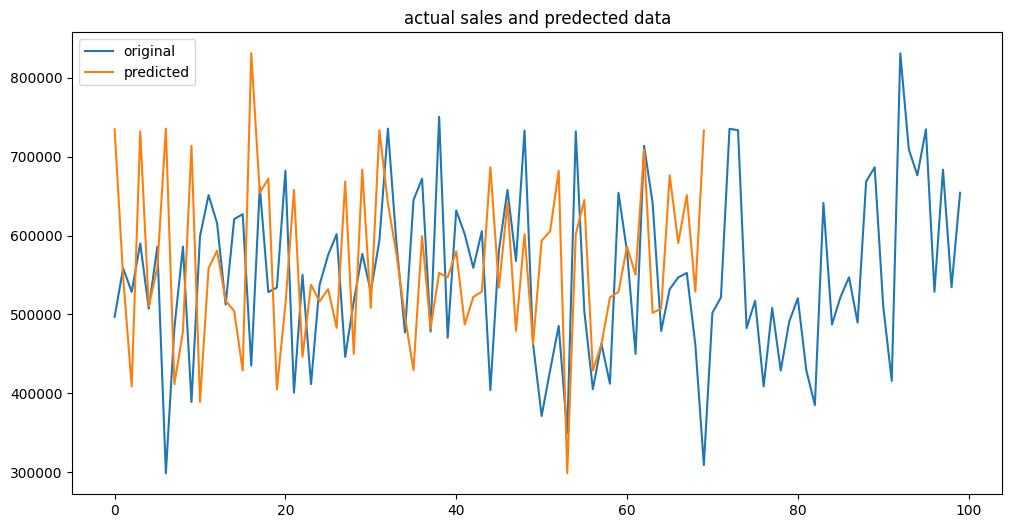

In [101]:
plt.figure(figsize=(12,6))
x_ax =range (len(df_index['Budget']))
plt.plot( df_index['Budget'], label="original")
plt.plot( y_pred_train,label="predicted")
plt.title("actual sales and predected data")
plt.legend()
plt.show()